In [14]:
# import docx
# import re
# import subprocess

# def convert_latex_in_word(file_path):
#     doc = docx.Document(file_path)
#     latex_pattern = '\\\(.*?\)\\\'
#     for paragraph in doc.paragraphs:
#         matches = re.findall(latex_pattern, paragraph.text)
#         for match in matches:
#             latex_formula = match[1:-1]  # Remove the square brackets
#             # Call an external program to convert LaTeX to Word formula
#             converted_formula = convert_latex_to_word_formula(latex_formula)
#             paragraph.text = paragraph.text.replace(match, converted_formula)
#     doc.save(file_path)

# def convert_latex_to_word_formula(latex_formula):
#     # Implement a method to convert LaTeX to Word formula.
#     # This could involve calling an external tool or using an online service.
#     # For demonstration purposes, let's assume a simple replacement.
#     return "WordFormulaFor_" + latex_formula


# file_path = r'E:/2023/2023产品开发/TF-SimFARM产品进展汇报_20241022/空气密度计算方法.docx'
# convert_latex_in_word(file_path)

# # file_path_processed = r'E:/2023/2023产品开发/TF-SimFARM产品进展汇报_20241022/空气密度计算方法_processed.docx'
# # convert_latex_in_word(file_path)

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取 Excel 文件
df1 = pd.read_excel('./空气密度/SI-200625-1.091 动态.xlsx', usecols=[0, 1, 2, 3])
df2 = pd.read_excel('./空气密度/SI-200625-1.225 动态.xlsx', usecols=[0, 1, 2, 3])
# # 打印读取的数据
print(df1,'\n',df2)


rho1 = 1.091
rho2 = 1.225
rho = 1.13


df['风速(m/s)'] = df1['风速(m/s)']  + (df2['风速(m/s)'] -df1['风速(m/s)'] )*(rho-rho1)/(rho2-rho1)
df['功率(kW)'] = df1['功率(kW)'] + (df2['功率(kW)']-df1['功率(kW)'])*(rho-rho1)/(rho2-rho1)
df['推力系数'] = df1['推力系数'] + (df2['推力系数']-df1['推力系数'])*(rho-rho1)/(rho2-rho1)
df['Cp'] = df1['Cp'] + (df2['Cp']-df1['Cp'])*(rho-rho1)/(rho2-rho1)
Cp1 = df1['Cp'] + (df2['Cp']-df1['Cp'])*(rho-rho1)/(rho2-rho1)

Cp2 = df['功率(kW)']/df2['功率(kW)']*df2['Cp']*1.225/1.13

print(Cp1,'\t', Cp2)
plt.plot(Cp1,Cp2)

df

    风速(m/s)  功率(kW)    推力系数      Cp
0       3.0   147.0  0.8424  0.3177
1       3.5   284.8  0.7584  0.3876
2       4.0   470.6  0.7032  0.4291
3       4.5   714.9  0.7035  0.4578
4       5.0  1016.6  0.7036  0.4746
5       5.5  1382.4  0.7043  0.4848
6       6.0  1795.3  0.7050  0.4850
7       6.5  2280.8  0.6759  0.4846
8       7.0  2846.7  0.6355  0.4843
9       7.5  3496.8  0.5987  0.4837
10      8.0  4246.3  0.5643  0.4839
11      8.5  4988.0  0.5324  0.4739
12      9.0  5589.9  0.5027  0.4474
13      9.5  5944.2  0.4742  0.4046
14     10.0  6124.4  0.4472  0.3574
15     10.5  6213.2  0.4207  0.3132
16     11.0  6241.7  0.3903  0.2736
17     11.5  6250.0  0.3266  0.2398
18     12.0  6250.0  0.2809  0.2111
19     12.5  6250.0  0.2454  0.1867
20     13.0  6250.0  0.2157  0.1660
21     13.5  6250.0  0.1914  0.1482
22     14.0  6250.0  0.1709  0.1329
23     14.5  6250.0  0.1535  0.1196
24     15.0  6250.0  0.1385  0.1081
25     15.5  6250.0  0.1255  0.0979
26     16.0  6250.0  0.1142 

ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
df3 = pd.DataFrame()
df3['风速(m/s)'] = df2['风速(m/s)'] * (rho2/rho)**(1/3)
df3['功率(kW)'] = df2['功率(kW)']
df3['推力系数'] = df2['推力系数']
df3['Cp'] = df2['Cp']
df3


In [109]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

df4 = df3

# Defining the new wind speeds for interpolation (3, 3.5, ..., 20)
new_wind_speeds = np.arange(3, 20.5, 0.5)

# Interpolating columns using linear interpolation
interp_power = interp1d(df4['风速(m/s)'], df4['功率(kW)'], kind='linear', fill_value="extrapolate")
interp_thrust_coeff = interp1d(df4['风速(m/s)'], df4['推力系数'], kind='linear', fill_value="extrapolate")
interp_cp = interp1d(df4['风速(m/s)'], df4['Cp'], kind='linear', fill_value="extrapolate")

# Creating the interpolated table
interpolated_df = pd.DataFrame({
    '风速(m/s)': new_wind_speeds,
    '功率(kW)': interp_power(new_wind_speeds),
    '推力系数': interp_thrust_coeff(new_wind_speeds),
    'Cp': interp_cp(new_wind_speeds)
})

df0 = interpolated_df
df0

,风速(m/s),功率(kW),推力系数,Cp
0,3.0,156.673213,0.855781,0.338204
1,3.5,296.168749,0.774011,0.382788
2,4.0,489.851743,0.715082,0.425167
3,4.5,742.669232,0.703552,0.454392
4,5.0,1054.695531,0.703820,0.471644
5,5.5,1433.314685,0.704466,0.482255
6,6.0,1868.262180,0.705245,0.485000
7,6.5,2374.075909,0.686116,0.485000
8,7.0,2963.764786,0.650516,0.485000
9,7.5,3640.369536,0.613355,0.484579


In [110]:
df0

,风速(m/s),功率(kW),推力系数,Cp
0,3.0,156.673213,0.855781,0.338204
1,3.5,296.168749,0.774011,0.382788
2,4.0,489.851743,0.715082,0.425167
3,4.5,742.669232,0.703552,0.454392
4,5.0,1054.695531,0.703820,0.471644
5,5.5,1433.314685,0.704466,0.482255
6,6.0,1868.262180,0.705245,0.485000
7,6.5,2374.075909,0.686116,0.485000
8,7.0,2963.764786,0.650516,0.485000
9,7.5,3640.369536,0.613355,0.484579


In [111]:
df

,功率(kW),功率(kW),功率(kW),风速(m/s),推力系数,Cp
0,156.458955,156.458955,156.458955,3.0,0.842400,0.325791
1,295.859701,295.859701,295.859701,3.5,0.758400,0.388677
2,489.314179,489.314179,489.314179,4.0,0.703258,0.430613
3,741.967164,741.967164,741.967164,4.5,0.703529,0.458644
4,1053.650000,1053.650000,1053.650000,5.0,0.703687,0.474891
5,1431.964925,1431.964925,1431.964925,5.5,0.704416,0.484858
6,1859.475373,1859.475373,1859.475373,6.0,0.705146,0.485000
7,2362.903731,2362.903731,2362.903731,6.5,0.675900,0.484716
8,2949.788060,2949.788060,2949.788060,7.0,0.635500,0.484504
9,3623.229851,3623.229851,3623.229851,7.5,0.598700,0.483875


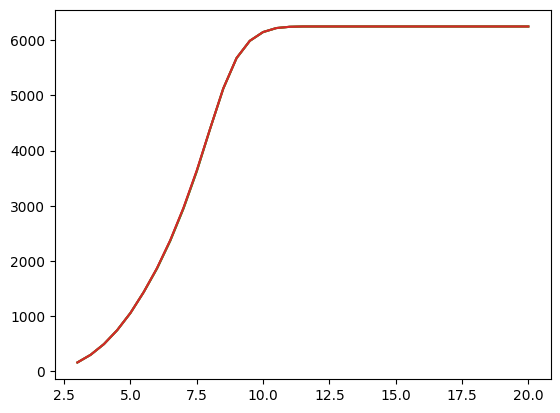

In [113]:
# import pandas as pd

# # 使用pd.concat()拼接
# df = pd.concat([df0['功率(kW)'], df['功率(kW)']], axis=1)


# print(df)

plt.plot(df['风速(m/s)'],df['功率(kW)'] )
plt.plot(df0['风速(m/s)'],df0['功率(kW)'] )

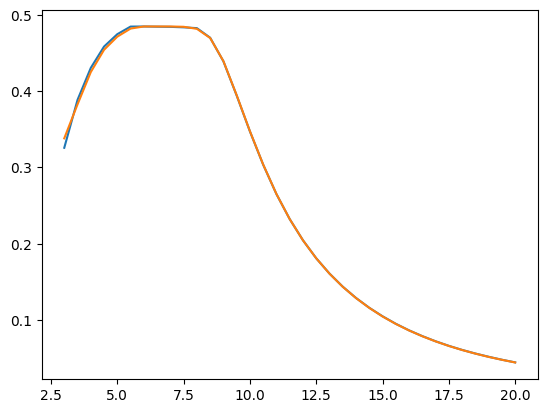

In [116]:
plt.plot(df['风速(m/s)'],df['Cp'] )
plt.plot(df0['风速(m/s)'],df0['Cp'] )

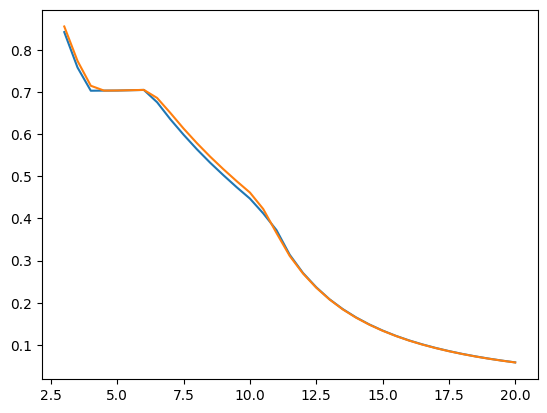

In [117]:
plt.plot(df['风速(m/s)'],df['推力系数'] )
plt.plot(df0['风速(m/s)'],df0['推力系数'] )

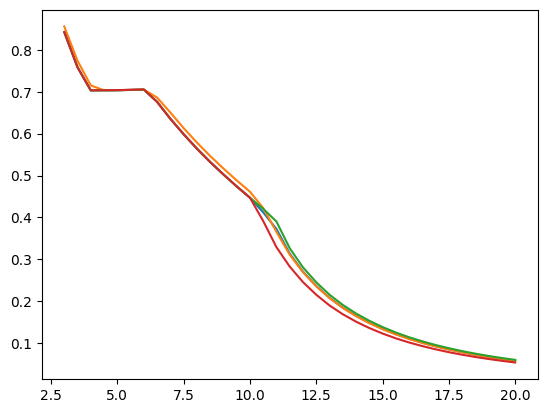

In [118]:
plt.plot(df['风速(m/s)'],df['推力系数'], df0['风速(m/s)'],df0['推力系数'] ,df1['风速(m/s)'],df1['推力系数'] , df2['风速(m/s)'],df2['推力系数']  )